# Classification of Rice Diseases

## Dataset

In [ ]:
!gdown --id 1a-7C6S6KSt9BfQl8whYx9yGAOdg_ZQXE

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1a-7C6S6KSt9BfQl8whYx9yGAOdg_ZQXE
To: /content/kaggle.json
100% 62.0/62.0 [00:00<00:00, 110kB/s]


In [ ]:
from IPython.display import clear_output

! pip install kaggle
clear_output()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Dataset dari link Kaggle 
1. https://www.kaggle.com/datasets/jonathanrjpereira/rice-disease
2. https://www.kaggle.com/datasets/badhon7432/paddyleafdiseaseuci

In [ ]:
! kaggle datasets download -d jonathanrjpereira/rice-disease

100% 4.55G/4.55G [03:43<00:00, 16.5MB/s]
100% 4.55G/4.55G [03:43<00:00, 21.9MB/s]


In [ ]:
! kaggle datasets download -d badhon7432/paddyleafdiseaseuci

 99% 159M/161M [00:08<00:00, 23.0MB/s]
100% 161M/161M [00:09<00:00, 18.7MB/s]


In [ ]:
! unzip rice-disease

clear_output()

In [ ]:
! unzip paddyleafdiseaseuci

clear_output()

## Preprocessing

In [ ]:
# importing shutil module 
import shutil 

In [ ]:
# Source path 
source1 = '/content/test/Bacterial leaf blight'
source2 = '/content/test/Brown spot'
source3 = '/content/test/Leaf smut'

# Destination path 
destination1 = '/content/Dataset/Bacterial leaf blight'
destination2 = '/content/Dataset/Brown spot'
destination3 = '/content/Dataset/Leaf smut'

# Move the content of 
# source to destination 
shutil.move(source1, destination1) 
shutil.move(source2, destination2) 
shutil.move(source3, destination3) 

'/content/Dataset/Leaf smut'

In [ ]:
# Source path 
source4 = '/content/Rice_All/Healthy'

# Destination path 
destination4 = '/content/Dataset/Healthy'

# Move the content of 
# source to destination  
shutil.move(source4, destination4) 

'/content/Dataset/Healthy'

In [ ]:
import os
dest1 = '/content/Dataset/Bacterial leaf blight'
src1 = '/content/train/Bacterial leaf blight/' # mind the '/' at the end
dest2 = '/content/Dataset/Brown spot'
src2 = '/content/train/Brown spot/'
dest3 = '/content/Dataset/Leaf smut'
src3 = '/content/train/Leaf smut/'
src4 = '/content/valid/Bacterial leaf blight/' # mind the '/' at the end
src5 = '/content/valid/Brown spot/'
src6 = '/content/valid/Leaf smut/'
[shutil.copy(src1+fn, dest1) for fn in os.listdir(src1)]
[shutil.copy(src2+fn, dest2) for fn in os.listdir(src2)]
[shutil.copy(src3+fn, dest3) for fn in os.listdir(src3)]
[shutil.copy(src4+fn, dest1) for fn in os.listdir(src4)]
[shutil.copy(src5+fn, dest2) for fn in os.listdir(src5)]
[shutil.copy(src6+fn, dest3) for fn in os.listdir(src6)]

clear_output()

In [ ]:
!rm -rf /content/Rice_All
!rm -rf /content/test
!rm -rf /content/train
!rm -rf /content/valid
!rm /content/paddyleafdiseaseuci.zip
!rm /content/rice-disease.zip

## Load Modul dan Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from collections import Counter
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from PIL import Image

from sklearn.model_selection import train_test_split

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
import os
rootdir = '/content/Dataset'

for subdir, dirs, files in os.walk(rootdir):
    if len(dirs) > 1:
      CLASSES = dirs

In [ ]:
len(CLASSES)

4

In [ ]:
CLASSES

['Bacterial leaf blight', 'Brown spot', 'Healthy', 'Leaf smut']

## Load Dataset

In [ ]:
IMAGE_DIM = 240,240
src = '/content/Dataset'
train = []

for i in CLASSES:
    path = os.path.join(src,i)
    idx = CLASSES.index(i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.resize(img_array, IMAGE_DIM)
        im_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        train.append([im_rgb, idx])

In [ ]:
X1=[] #Training images
y1=[] #labels
for i,j in train:
    X1.append(i)
    y1.append(j)

In [ ]:
X2=[] #Training images
y2=[] #labels
for i,j in train:
    X2.append(i)
    y2.append(j)

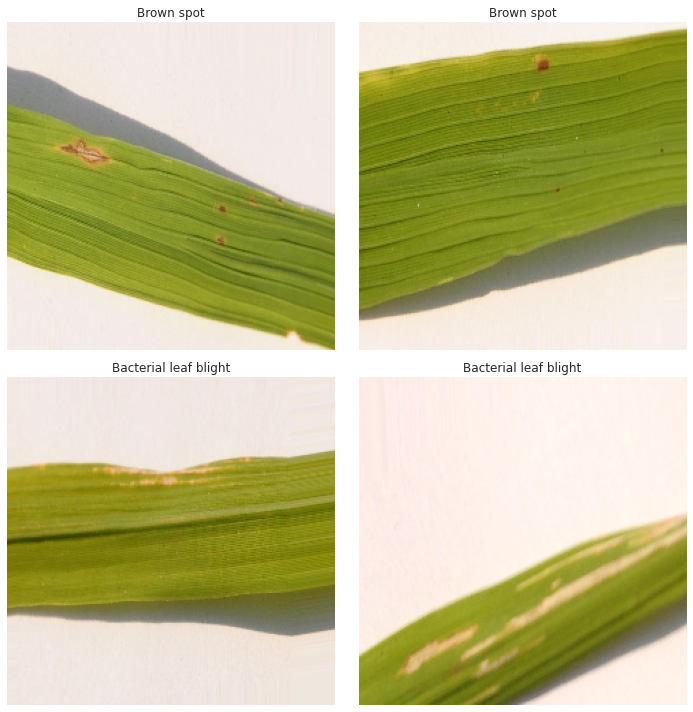

In [ ]:
ROWS = 2
COLS = 2

fig,ax = plt.subplots(ROWS, COLS)
fig.set_size_inches(10,10)

for i in range(ROWS):
    for j in range(COLS):
        l = np.random.randint(0, len(y1))
        ax[i,j].imshow(X1[l])
        ax[i,j].set_title(CLASSES[y1[l]])
        ax[i,j].axis('off') 

plt.tight_layout()

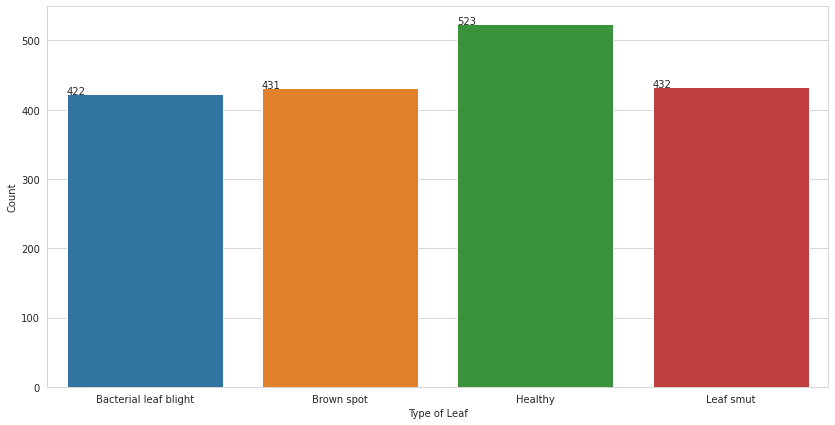

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (14,7))
fig = sns.countplot(x = y1)
fig.set(xticks = range(len(CLASSES)), xticklabels = [i for i in CLASSES])
plt.xlabel('Type of Leaf')
plt.ylabel('Count')

for p in fig.patches:
        fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

In [ ]:
#Reshaping & Normalizing
X = np.array(X1).reshape(-1,*IMAGE_DIM,3)/255.0
#X = np.array(X1)

#OneHotEncoding
y = to_categorical(y1)

#Spliting train data into training & validation sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 32)

np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((1446, 240, 240, 3), (1446, 4), (362, 240, 240, 3), (362, 4))

In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

In [ ]:
datagen.fit(x_train)

In [ ]:
np.shape(x_train)

(1446, 240, 240, 3)

## Training


### DenseNet121 [[2020]](https://pitmonticone.github.io/PlantDiseaseClassification/Report/report.pdf)


<img src='https://iq.opengenus.org/content/images/2021/08/fig.JPG' width=10000px>

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import plot_model

model = DenseNet121(weights='imagenet', include_top=False, input_shape=(*IMAGE_DIM,3), pooling='avg')

print('Total params:',model.name,'=', format(model.count_params(),',d'))
# model.summary()
# plot_model(model, to_file=model.name+'.png', show_shapes=True, show_layer_names=False)

Total params: densenet121 = 7,037,504


### Add top layer network

In [ ]:
x = model.output
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
predictions = Dense(len(CLASSES), activation='softmax')(x)
myModel_imagenet = Model(inputs=model.input, outputs=predictions, name='EfficientNetB4')
myModel_imagenet.summary()

Model: "EfficientNetB4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 246, 246, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 120, 120, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                    

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.676515 to fit



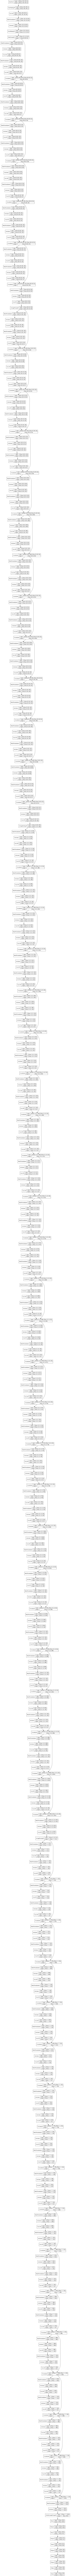

In [ ]:
plot_model(myModel_imagenet, to_file=model.name+'.png', show_shapes=True, show_layer_names=False)

In [ ]:
optim = optimizers.Adam(learning_rate=0.00001)
myModel_imagenet.compile(loss='categorical_crossentropy',
                        optimizer=optim, metrics=['accuracy'])

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
NUM_TRAINING_IMAGES = x_train.shape[0]
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

history = myModel_imagenet.fit_generator(datagen.flow(x_train, y_train, batch_size = BATCH_SIZE),
                        epochs = EPOCHS, verbose = 1, 
                        validation_data = (x_test,y_test),
                        steps_per_epoch = STEPS_PER_EPOCH)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/50
22/22 [==============================] - 59s 1s/step - loss: 1.6465 - accuracy: 0.2540 - val_loss: 1.4277 - val_accuracy: 0.2486
Epoch 2/50
22/22 [==============================] - 23s 1s/step - loss: 1.3529 - accuracy: 0.3162 - val_loss: 1.3208 - val_accuracy: 0.3122
Epoch 3/50
22/22 [==============================] - 23s 1s/step - loss: 1.1882 - accuracy: 0.4436 - val_loss: 1.2214 - val_accuracy: 0.4696
Epoch 4/50
22/22 [==============================] - 22s 998ms/step - loss: 1.0581 - accuracy: 0.5839 - val_loss: 1.1031 - val_accuracy: 0.7293
Epoch 5/50
22/22 [==============================] - 22s 1s/step - loss: 0.9197 - accuracy: 0.6896 - val_loss: 0.9331 - val_accuracy: 0.8729
Epoch 6/50
22/22 [==============================] - 22s 976ms/step - loss: 0.7731 - accuracy: 0.7836 - val_loss: 0.7534 - val_accuracy: 0.9227
Epoch 7/50
22/22 [==============================] - 23s 1s/step - loss: 0.6222 - accuracy: 0.8603 - val_loss: 0.5658 - val_accuracy: 0.9558
Epoch 8/50
22/

## Evaluation

In [ ]:
results = myModel_imagenet.evaluate(x_test, y_test, batch_size = BATCH_SIZE)
print("Validation loss, accuracy:", results)

6/6 [==============================] - 4s 565ms/step - loss: 1.1152e-04 - accuracy: 1.0000
Validation loss, accuracy: [0.00011152093793498352, 1.0]


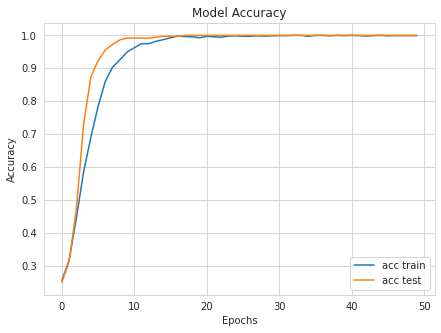

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['accuracy'], label='acc train')
plt.plot(history.history['val_accuracy'], label='acc test')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

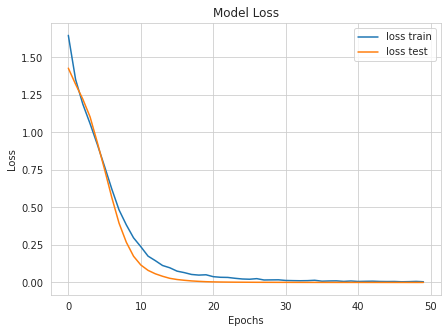

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for CNN DenseNet121 Rice Deseases')
print('---------------------------')
Y_pred_fastcnn2 = myModel_imagenet.predict(x_test)
Y_pred_fastcnn2 = Y_pred_fastcnn2>0.5
print(classification_report(y_test,Y_pred_fastcnn2))
print('---------------------------')

Model Metrics for CNN DenseNet121 Rice Deseases
---------------------------
12/12 [==============================] - 1s 106ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00        87

   micro avg       1.00      1.00      1.00       362
   macro avg       1.00      1.00      1.00       362
weighted avg       1.00      1.00      1.00       362
 samples avg       1.00      1.00      1.00       362

---------------------------


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#predictions_one_hot = model.predict(x_test)
cm = confusion_matrix(y_test.argmax(axis=1), Y_pred_fastcnn2.argmax(axis=1))
print(cm)

[[ 84   0   0   0]
 [  0  86   0   0]
 [  0   0 105   0]
 [  0   0   0  87]]


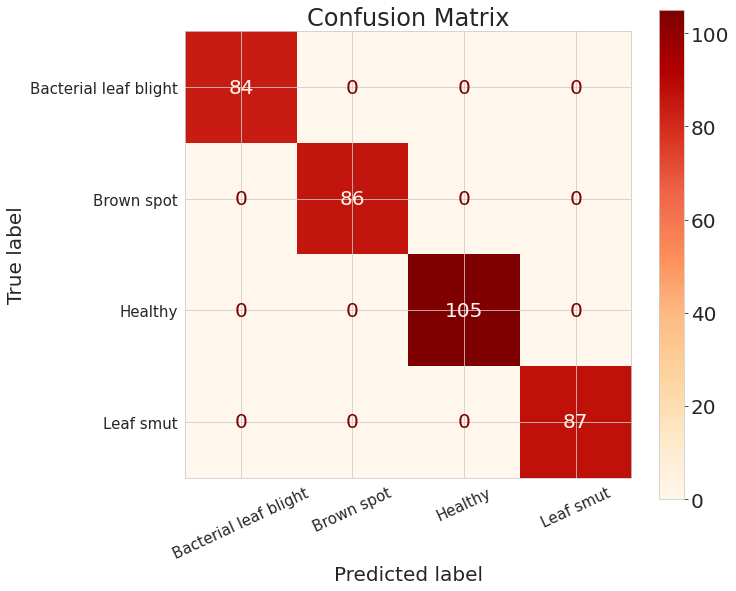

In [ ]:
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(cm, display_labels=CLASSES)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()

In [ ]:
# save my model
myModel_imagenet.save('/content/rice_model_desease.hdf5')

In [ ]:
from keras.models import load_model
 
myModel_imagenet = load_model('/content/rice_model_desease.hdf5')

## Testing Image

### Dengan Data Test Acak Dari Dataset

1/1 [==============================] - 0s 388ms/step


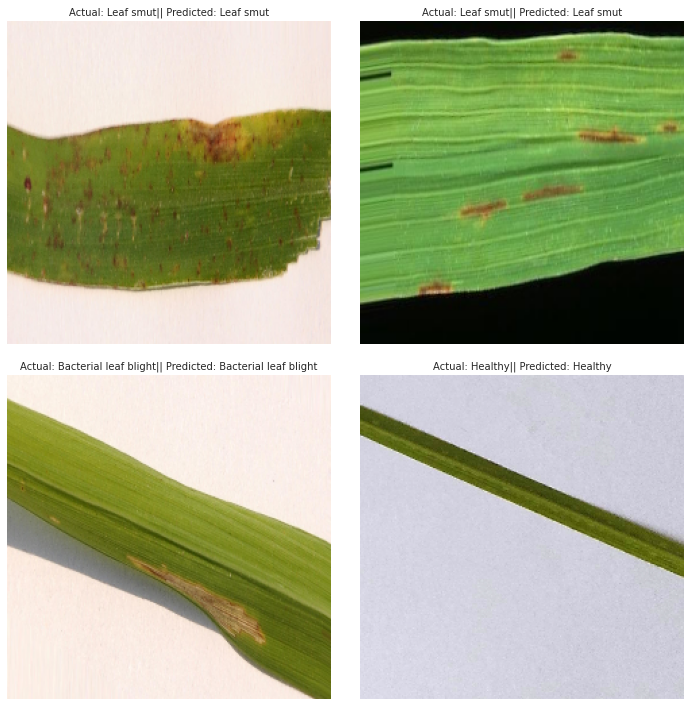

In [ ]:
ROWS = 2
COLS = 2

fig,ax = plt.subplots(ROWS, COLS)
fig.set_size_inches(10,10)

for i in range(ROWS):
    for j in range(COLS):
        l = np.random.randint(0, len(y2))
        new_img2 = np.array(X2[l]).reshape(*IMAGE_DIM,3)/255.0
        new_img2 = np.expand_dims(new_img2,0)
        pred = myModel_imagenet.predict(new_img2)
        class_id = np.argmax(pred)
        ax[i,j].imshow(X2[l])
        ax[i,j].set_title('Actual: '+CLASSES[y2[l]]+'||'+' Predicted: '+CLASSES[class_id], fontsize=10)
        ax[i,j].axis('off') 

plt.tight_layout()

### Dengan Data Dari Internet

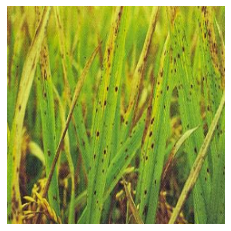

1/1 [==============================] - 0s 218ms/step
id kelas prediksi 1
kelas prediksi Brown spot


In [ ]:
import requests
import urllib

urls = ['https://2.bp.blogspot.com/-_o6wM7J0ICY/W4tcTHsP3bI/AAAAAAAAAns/BHzkmxaJqqAZRZwV8fUIaMt9Qsc7CyX4wCLcBGAs/s1600/Screenshot_58.png']
for uri in urls:
  url_response = urllib.request.urlopen(uri)
  img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
  img = cv2.imdecode(img_array, -1)
  img_array = cv2.resize(img, IMAGE_DIM)
  im_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  new_img2 = np.array(im_rgb).reshape(*IMAGE_DIM,3)/255.0
  plt.imshow(im_rgb)
  plt.axis('off')
  plt.show()

  new_img2 = np.expand_dims(new_img2,0)
  pred = myModel_imagenet.predict(new_img2)
  class_id = np.argmax(pred)
  print('id kelas prediksi',class_id)
  print('kelas prediksi', CLASSES[class_id])